In [11]:
#当loss是绝对值时的情形

In [5]:
# loss函数
def loss(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [30]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        if y_i>y_hat_i:
            gradient+=-x_i
        if y_i<y_hat_i:
            gradient+=x_i            
    return gradient/n



def partial_b(x,y,y_hat):
    n=len(y)
    
    gradient=0
    
    for x_i,y_i,y_hat_i in zip(list(x),list(y),list(y_hat)):
        if y_i>y_hat_i:
            gradient+=-1
        if y_i<y_hat_i:
            gradient+=1
        
    
    return gradient

In [31]:
from sklearn.datasets import load_boston

In [32]:
data = load_boston()

In [33]:
X, y = data['data'], data['target']

In [34]:
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt

In [36]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

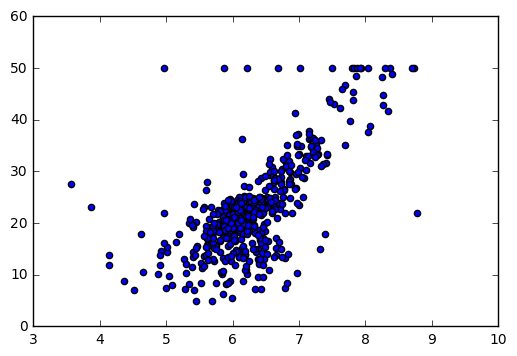

In [37]:
draw_rm_and_price()

In [38]:
import random

In [39]:
#设置y=k*x+b函数
def price(rm,k,b):
    '''f(x)=k*x+b'''
    return k*rm+b

In [41]:
trying_times=2000

min_loss = float('inf')
X_rm = X[:, 5]
current_k =random.random()*200-100
current_b =random.random()*200-100

learning_rate = 1e-04



update_time=0

for i in range(trying_times):
        
    price_by_k_and_b=[price(r,current_k,current_b) for r in X_rm]
    
    current_loss=loss(y,price_by_k_and_b)
    
    
    if current_loss < min_loss:  # performance became better
        min_loss=current_loss
        best_k,best_b=current_k,current_b
        
        
        update_time+=1
        
        
        if update_time%10==0:
            print('When time is: {},get best_k: {} best_b:{},and the loss is: {}'.format(i,best_k,best_b,min_loss))
    
    k_gradient=partial_k(X_rm,y,price_by_k_and_b)
    
    b_gradient=partial_b(X_rm,y,price_by_k_and_b)
    
    current_k=current_k+(-1*k_gradient)*learning_rate
    current_b=current_b+(-1*b_gradient)*learning_rate

When time is: 9,get best_k: -39.23859975353596 best_b:-10.7261850696536,and the loss is: 279.8592447163692
When time is: 19,get best_k: -39.23231511914859 best_b:-10.220185069653606,and the loss is: 279.31374808698683
When time is: 29,get best_k: -39.22603048476122 best_b:-9.714185069653613,and the loss is: 278.7682514576041
When time is: 39,get best_k: -39.21974585037385 best_b:-9.20818506965362,and the loss is: 278.22275482822107
When time is: 49,get best_k: -39.21346121598648 best_b:-8.702185069653627,and the loss is: 277.6772581988381
When time is: 59,get best_k: -39.20717658159911 best_b:-8.196185069653634,and the loss is: 277.1317615694553
When time is: 69,get best_k: -39.20089194721174 best_b:-7.6901850696536345,and the loss is: 276.5862649400725
When time is: 79,get best_k: -39.19460731282437 best_b:-7.1841850696536325,and the loss is: 276.04076831068977
When time is: 89,get best_k: -39.188322678437 best_b:-6.6781850696536305,and the loss is: 275.4952716813071
When time is: 99,